# Curvature Visualization
Visualizes curvature along different discretized curves

In [39]:
import numpy as np
import matplotlib.pyplot as plt

## Curvature Computation

In [40]:
def compute_curvature(curve):
    """
    Compute curvature along a curve.
    curvature = |d_curve × dd_curve| / |d_curve|^3
    """
    d_curve = np.gradient(curve, axis=0, edge_order=2)
    dd_curve = np.gradient(d_curve, axis=0, edge_order=2)
    cross = np.cross(d_curve, dd_curve)
    
    curvature = np.linalg.norm(cross, axis=1) / (np.linalg.norm(d_curve, axis=1)**3 + 1e-10)
    
    return curvature

## Normal Ring (Constant Curvature)

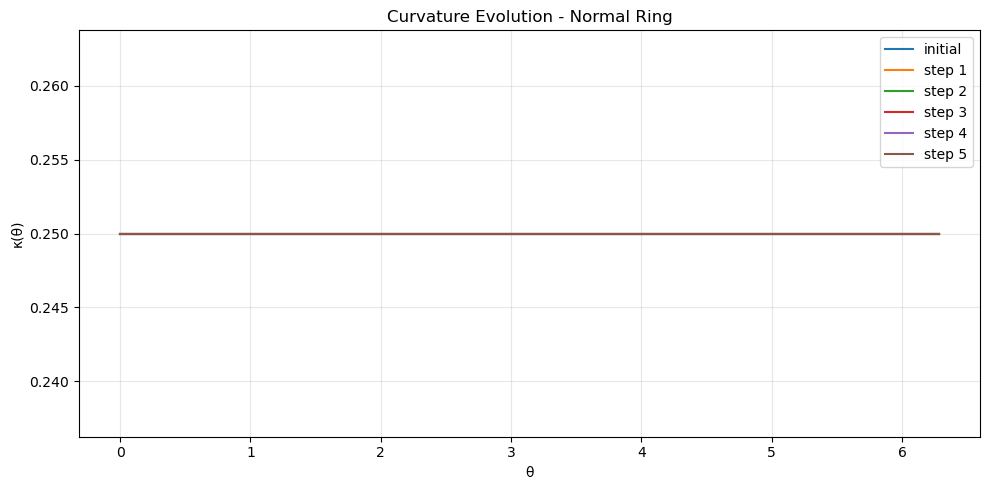

In [41]:
# Simple circle
R = 4.0
N = 100
theta = np.linspace(0, 2 * np.pi, N)

gamma = np.stack((R * np.cos(theta), R * np.sin(theta), np.zeros_like(theta)), axis=1)

# Evolution parameters
time_step = 100
num_steps = 5

plt.figure(figsize=(10, 5))

for step in range(num_steps + 1):
    # Derivatives
    d_gamma = np.stack((-R * np.sin(theta), R * np.cos(theta), np.zeros_like(theta)), axis=1)
    dd_gamma = np.stack((-R * np.cos(theta), -R * np.sin(theta), np.zeros_like(theta)), axis=1)
    cross = np.cross(d_gamma, dd_gamma)
    
    # Curvature
    curvature = np.linalg.norm(cross, axis=1) / (np.linalg.norm(d_gamma, axis=1))**3
    
    # Plot curvature
    label = f"step {step}" if step > 0 else "initial"
    plt.plot(theta, curvature, label=label)
    
    # Evolve curve
    gamma = gamma + time_step * (curvature[:, None] * cross)

plt.title('Curvature Evolution - Normal Ring')
plt.xlabel('θ')
plt.ylabel('κ(θ)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Kelvin Ring

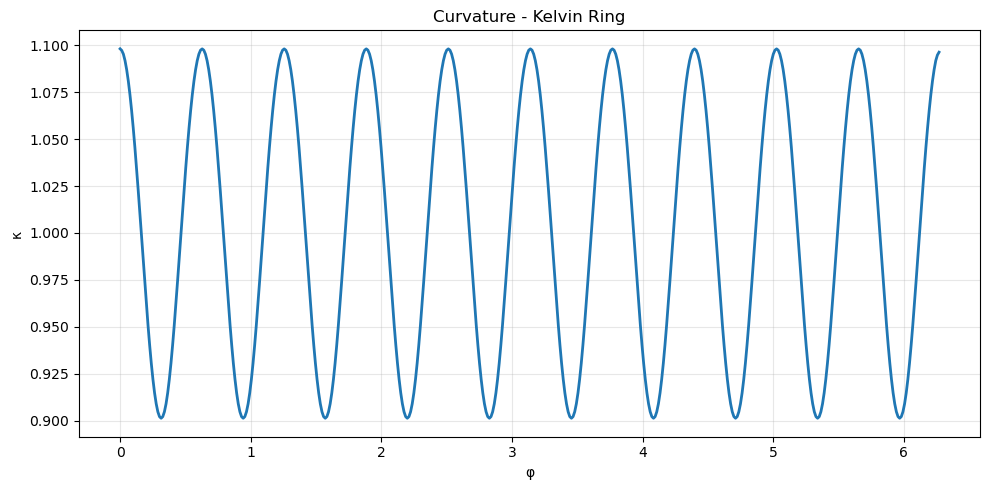

In [42]:
# Parameters
R = 1.0
A = 0.001
N = 10
num_points = 500
phi = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

# Kelvin ring
x = R * np.cos(phi) + A * np.cos(N * phi) * np.cos(phi)
y = R * np.sin(phi) + A * np.cos(N * phi) * np.sin(phi)
z = -A * np.sin(N * phi)
gamma = np.stack((x, y, z), axis=1)

curvature = compute_curvature(gamma)

plt.figure(figsize=(10, 5))
plt.plot(phi, curvature, linewidth=2)
plt.title('Curvature - Kelvin Ring')
plt.xlabel('φ')
plt.ylabel('κ')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Perturbed Ring

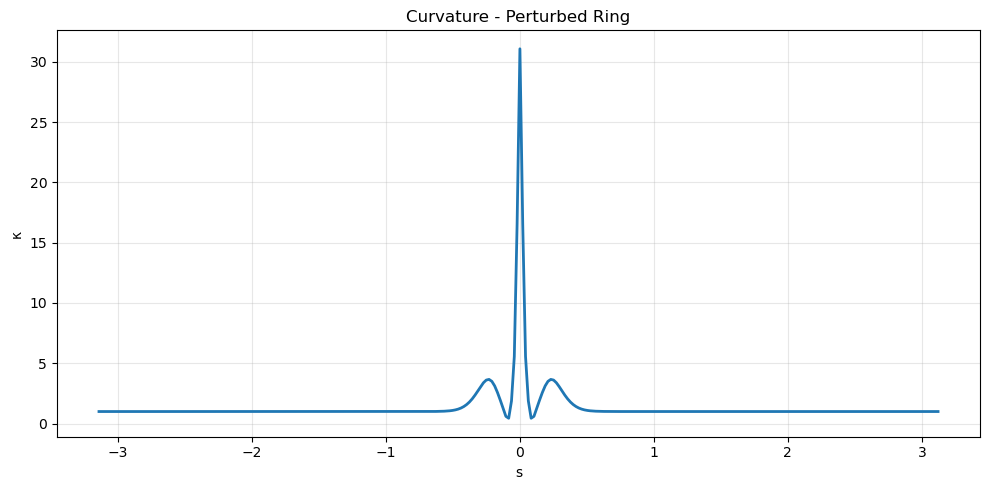

In [43]:
# Circular ring with sech perturbation
num_points = 300
s = np.linspace(-np.pi, np.pi, num_points, endpoint=False)

x = np.cos(s)
y = np.sin(s)
z = (1/3) / np.cosh(10 * s)
gamma = np.stack((x, y, z), axis=1)

curvature = compute_curvature(gamma)

plt.figure(figsize=(10, 5))
plt.plot(s, curvature, linewidth=2)
plt.title('Curvature - Perturbed Ring')
plt.xlabel('s')
plt.ylabel('κ')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Hasimoto Soliton - Curvature Evolution

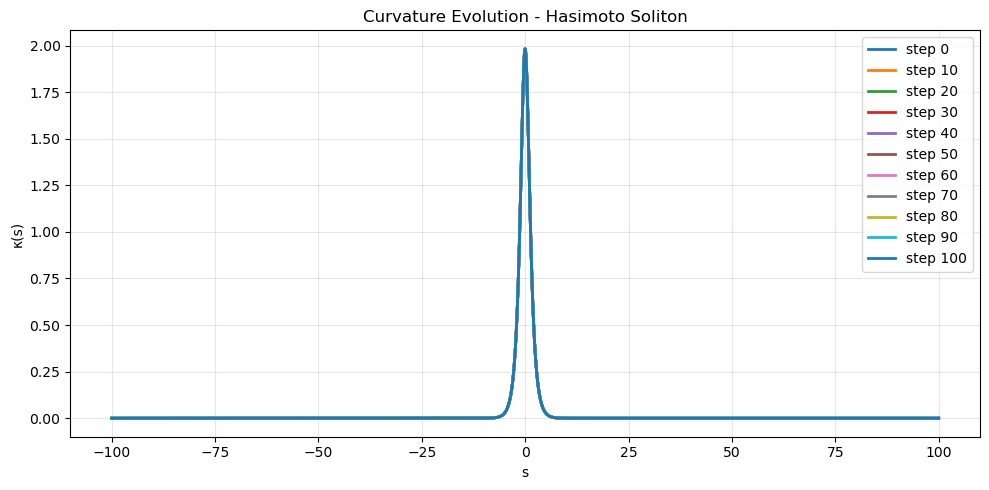

In [44]:
# Parameters
s = np.linspace(-100, 100, 1500)
t = 0

nu = 1.0
tau_0 = 0.5

eta = nu * (s - 2 * tau_0 * t)
mu = 1 / (1 + tau_0**2)
gamma_amp = (2 * mu * (1 / np.cosh(eta))) / nu
theta = tau_0 * s + (nu**2 - tau_0**2) * t

x = s - (2 * mu / nu) * np.tanh(eta)
y = gamma_amp * np.cos(theta)
z = -gamma_amp * np.sin(theta)

soliton = np.stack((x, y, z), axis=1)

# Evolution parameters
time_step = 0.01
num_steps = 100

plt.figure(figsize=(10, 5))

for step in range(num_steps + 1):
    curvature = compute_curvature(soliton)
    
    # Plot every 10 steps
    if step % 10 == 0:
        plt.plot(s, curvature, label=f"step {step}", linewidth=2)
    
    # Evolve curve
    d_soliton = np.gradient(soliton, axis=0, edge_order=2)
    dd_soliton = np.gradient(d_soliton, axis=0, edge_order=2)
    cross = np.cross(d_soliton, dd_soliton)
    soliton = soliton + time_step * (curvature[:, None] * cross)

plt.title('Curvature Evolution - Hasimoto Soliton')
plt.xlabel('s')
plt.ylabel('κ(s)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()